To import a txt file and transform if as a list. Note here new line separation

Program to submit a list of input search to pubmed and output data frame with input and search term 

In [7]:
file = open('/Users/kim/BioMed X Lee Kim Swee/BioMed X RNAseq/RNA seq Neutrophils/Top100_membrane_invitroCD15.txt', "r")
mylist = file.read().split('"\n"')
mylist[0] = 'MS4A4A'
mylist[-1] = 'SPN'
print (mylist)

['MS4A4A', 'APCDD1', 'DHCR24', 'CYP19A1', 'EPB41L3', 'FAM69B', 'MELK', 'SIGLEC12', 'IFRD2', 'ELOVL6', 'SLC16A7', 'NIPA1', 'NPDC1', 'SDC4', 'SLC38A5', 'SLC7A1', 'MTHFD1', 'PANX1', 'RRM2', 'TMEM237', 'SLC35F2', 'LDLRAD3', 'ENG', 'SCN8A', 'SRPRB', 'LRP12', 'PLXND1', 'MTHFD1L', 'SLC35G1', 'POLR1E', 'ALG8', 'PTGFRN', 'LRP5', 'ASGR2', 'LINC00116', 'ECSCR', 'IL17RB', 'KCNK13', 'DPY19L4', 'ZDHHC21', 'TMEM97', 'SLC35B4', 'ADORA2B', 'MARCH1', 'SLC22A31', 'EDA2R', 'LRP1', 'FADS1', 'FAM213A', 'SLC16A1', 'LMAN1', 'LRP8', 'KCNMB1', 'WDHD1', 'SLC29A2', 'PTGFR', 'LRFN4', 'KCNQ5', 'CELSR1', 'TMPO', 'DHODH', 'AKAP1', 'MS4A3', 'SLC39A14', 'LGR4', 'NKG7', 'TSPAN4', 'LRP11', 'SLC12A7', 'SLC14A2', 'SCD', 'P2RY1', 'SLC39A8', 'SLC9B2', 'PARVB', 'KLRG1', 'WDR17', 'CEACAM6', 'EDNRB', 'SLC28A3', 'MDFIC', 'CHEK2', 'ADAM22', 'FAM57B', 'CD86', 'ANAPC1', 'SQLE', 'RBL1', 'EVC', 'MGST1', 'SLCO2B1', 'NETO2', 'TMEM217', 'GPI', 'DNAJC5B', 'MLC1', 'TMED3', 'STAB1', 'ANO8', 'SPN']


In [12]:
rows = []
columns = ['tumor', 'cancer', 'monocyte', 'macrophage', 'neutrophil', 'granulocyte', 'myeloid']

In [13]:
rows = mylist

In [14]:
import urllib.parse
import urllib.request
# requires urllib to get webpage info
import re
# requires re to locate number of hits in source code
import pandas as pd
# requires pandas to output data frame

# define a search list
url = 'https://www.ncbi.nlm.nih.gov/pubmed/?term='
# open pubmed website with ? for request
df = pd.DataFrame()
# create empty data frame
for i in rows:
    newrow = []
    for j in columns:
        req = url + i + "+" + j
        resp = urllib.request.urlopen(req)
        # open page for each request
        x = resp.read()
        text = x.decode('utf-8')
        # transform page into object to pass to re
        number = re.search(r'id="resultcount" value="(.*)" /><input name', text)  
        hits = number.group(1)
        # having identified strings that precedes and follow relevant info, retrieve it using re.search
        newrow.append(hits)
        # then output group with index = 1 
    newrow2 = pd.Series(newrow) # needs to be a pandas Series to append!
    # append to the dataFrame
    df = df.append(newrow2, ignore_index=True)

# Rename row and columns
df.index = rows
df.columns = columns
# Convert all Columns to numeric
df.apply(pd.to_numeric)
print (df)

         tumor cancer monocyte macrophage neutrophil granulocyte myeloid
MS4A4A       4      3        2          4          1           1       1
APCDD1       4      7        0          1          0           0       0
DHCR24      48     36        1          4          1           0       1
CYP19A1   6597   7287       35        136          8          14      17
EPB41L3     76     70        0          0          0           1       0
FAM69B       0      0        0          0          0           0       0
MELK       111    111        5          6          0           0       6
SIGLEC12     2      2        0          1          0           0       0
IFRD2        6      4        0          0          0           0       0
ELOVL6      18     21        1          2          0           0       1
SLC16A7     30     23        1          1          0           1       0
NIPA1        1      1        0          0          0           0       0
NPDC1        4      5        0          0          

In [15]:
df.to_csv('/Users/kim/BioMed X Lee Kim Swee/BioMed X RNAseq/RNA seq Neutrophils/LKS170908_pubmed_top100.txt', sep='\t', index=True)

In [95]:
df2.dtypes

myeloid          float64
cancer           float64
tumor            float64
immunotherapy    float64
immunology       float64
dtype: object

In [83]:
import numpy as np
df2 = df.apply(pd.to_numeric)

In [85]:
# replace 0 by 1 before log transformation
df2.replace(0, 1, inplace=True)

In [87]:
# log transform all series
df2 = df2.apply(np.log10)

In [88]:
print (df2)

           myeloid    cancer     tumor  immunotherapy  immunology
Genes     4.208925  5.354525  5.444562       4.021148    5.131824
Aldh1l2   0.000000  0.778151  0.698970       0.000000    0.000000
Apob      0.903090  2.728354  2.906335       1.568202    2.879096
Apobr     0.903090  2.728354  2.906335       1.568202    2.879096
Asgr1     0.000000  0.845098  0.602060       0.000000    0.845098
Atf6      1.113943  2.423246  2.454845       0.698970    1.968483
Axl       1.732394  2.763428  2.746634       1.342423    2.193125
Cadm4     0.000000  0.954243  1.000000       0.000000    0.000000
CD276     1.041393  2.170262  2.184691       1.544068    2.146128
Cd79a     2.103804  2.989450  3.010300       1.531479    2.774517
Cflar     1.662758  2.746634  2.847573       1.230449    2.480007
Clec1b    0.000000  0.602060  0.698970       0.000000    0.477121
Clec4e    0.903090  0.602060  0.602060       0.000000    1.255273
Cxcr1     1.380211  2.387390  2.507856       1.113943    2.632457
Cyba      

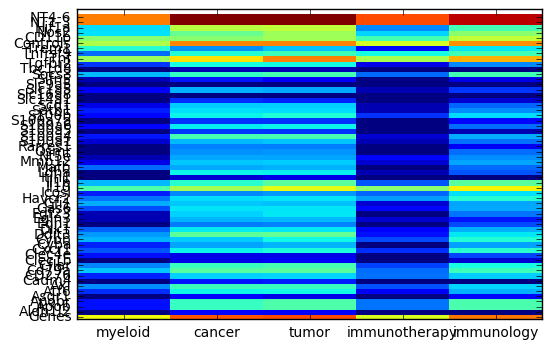

In [89]:
## make heatmap
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

plt.pcolor(df2)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

In [9]:
df.to_csv('test170201.txt', sep='\t', index=False)

In [22]:
a = ['john', 'tod']
test = ['kim', 'jim', 'tim']
names = a+test
test2 = "+".join(names)
print (test2)

john+tod+kim+jim+tim


In [41]:
import pandas as pd

first = ['Kim', 'Jim', 'Tim']
last = ['Swee', 'Repetti', 'Kocher']

df = pd.DataFrame()

for i in first:
    row = []
    for j in last:
        name = str(i)+" "+str(j)
        row.append(name)
        row2 = pd.Series(row)
    df = df.append(row2, ignore_index= True)
df.index = first
df.columns = last

In [42]:
print (df)

         Swee      Repetti      Kocher
Kim  Kim Swee  Kim Repetti  Kim Kocher
Jim  Jim Swee  Jim Repetti  Jim Kocher
Tim  Tim Swee  Tim Repetti  Tim Kocher


In [21]:
df = pd.DataFrame()
exemple = ['kim', 'jim', 'tim']
df = df.append(exemple)
df = df.append([1,4,6])
print (df)

     0
0  kim
1  jim
2  tim
0    1
1    4
2    6


In [14]:
df.append([1,4,6], i)

,0
0,1
1,4
2,6


In [15]:
print (df)

Empty DataFrame
Columns: []
Index: []


In [16]:
df

""


In [35]:
i = 'kim'
j = 'swee'
full= i+'+'+j
print (full)

kim+swee
